https://colab.research.google.com

In [2]:
import tensorflow
import tensorflow_datasets as tfds

malaria, info = tfds.load(name="malaria",
                          split="train",
                          with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/malaria/1.0.0.incompleteRZN4RV/malaria-train.tfrecord


Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
malaria

<PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [4]:
info

tfds.core.DatasetInfo(
    name='malaria',
    version=1.0.0,
    description='The Malaria dataset contains a total of 27,558 cell images
with equal instances of parasitized and uninfected cells from the thin blood 
smear slide images of segmented cells.',
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=27558,
    splits={
        'train': 27558,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward 
      improved malaria parasite detection in thin blood smear images},
      author={Rajaraman, Sivaramakrishnan and Antani, Sameer K and Poostchi, Mahdieh
      and Silamut, Kamolrat and Hossain, Md A and Maude, Richard J and Jaeger, 
      Stefan and Thoma, George R}

In [5]:
malaria = malaria.shuffle(20000).prefetch(tensorflow.data.experimental.AUTOTUNE)

malaria

<PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>

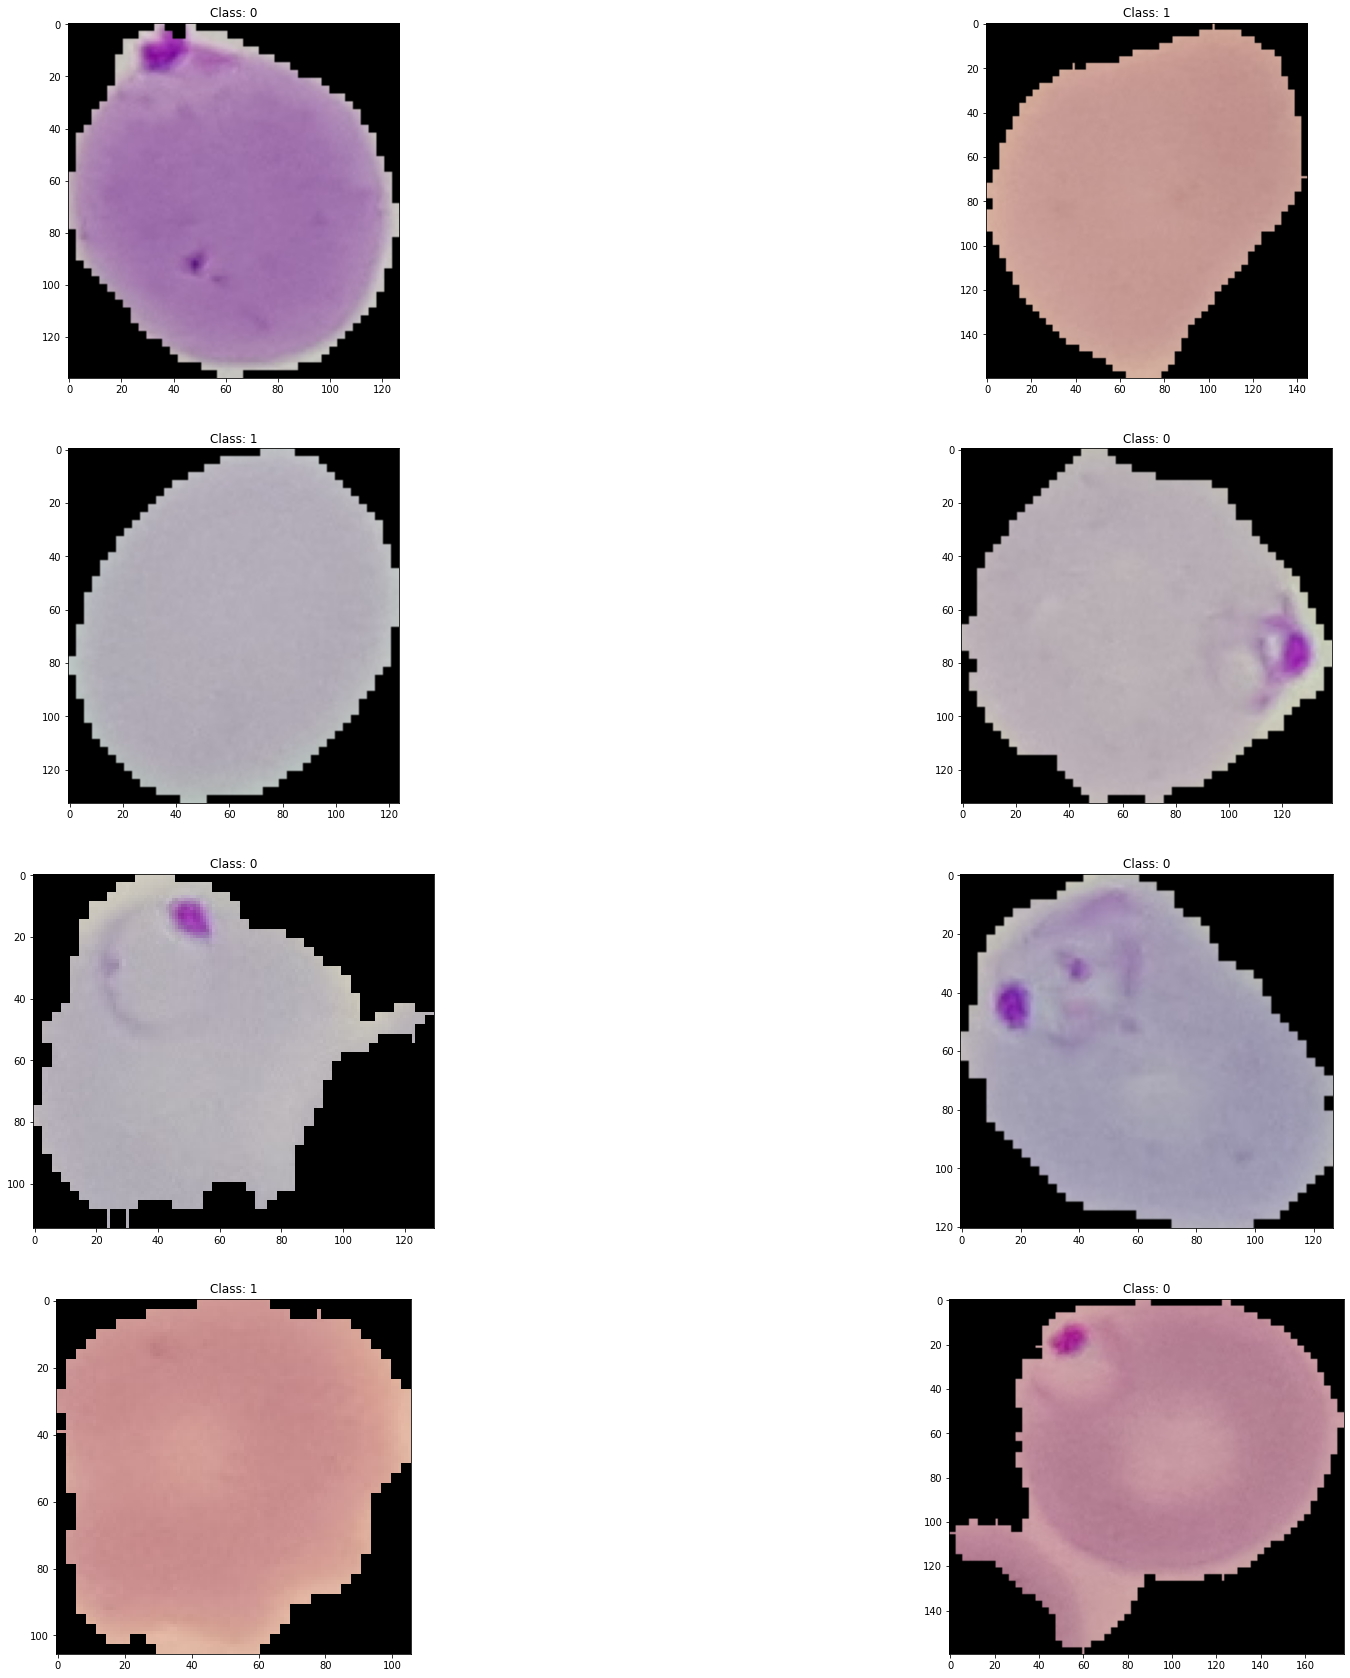

In [6]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(30, 30))

num_of_images = 8

for index, feature in enumerate(malaria.take(num_of_images)):

  image = feature["image"].numpy()

  label = feature["label"].numpy()

  pyplot.subplot(4, 2, index + 1)

  pyplot.title("Class: " + str(label))

  pyplot.imshow(image)

pyplot.show()

In [7]:
dataset_length = 8000

new_size = 133

training_dataset_length = 0.8

X = int(dataset_length * training_dataset_length)

import numpy

colors = 3

training_images = numpy.zeros((X, new_size, new_size, colors))

training_labels = numpy.zeros(X)

y = dataset_length - X

testing_images = numpy.zeros((y, new_size, new_size, colors))

testing_labels = numpy.zeros(y)


for index, cell in enumerate(malaria.take(dataset_length)):

  image = tensorflow.image.resize(cell["image"],
                                  size=[new_size, new_size]).numpy() 

  label = cell["label"].numpy()

  if index < X:

    training_images[index] = image

    training_labels[index] = label

  else: 

    testing_images[index - X] = image

    testing_labels[index - X] = label

In [8]:
training_images.shape

(6400, 133, 133, 3)

In [9]:
training_labels.shape

(6400,)

In [10]:
testing_images.shape

(1600, 133, 133, 3)

In [11]:
testing_labels.shape

(1600,)

In [15]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(new_size,
                                            new_size,
                                            colors)))

model.add(keras.layers.Dense(200, activation="relu"))

model.add(keras.layers.Dense(150, activation="relu"))

model.add(keras.layers.Dense(8))

optimizer = tensorflow.keras.optimizers.Adam()

loss_function = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

metrics = ["accuracy"]

model.compile(optimizer = optimizer,
              loss = loss_function,
              metrics = metrics)

In [16]:
number_of_training_loops = 5

model.fit(training_images, training_labels,
          epochs = number_of_training_loops)

Epoch 1/5
200/200 [==============================] - 2s 6ms/step - loss: 755.5666 - accuracy: 0.5486
Epoch 2/5
200/200 [==============================] - 1s 6ms/step - loss: 158.0801 - accuracy: 0.5514
Epoch 3/5
200/200 [==============================] - 1s 6ms/step - loss: 75.5836 - accuracy: 0.5528
Epoch 4/5
200/200 [==============================] - 1s 6ms/step - loss: 10.1290 - accuracy: 0.5895
Epoch 5/5
200/200 [==============================] - 1s 6ms/step - loss: 11.7690 - accuracy: 0.5766


In [17]:
testing_loss, testing_accuracy = model.evaluate(testing_images, 
                                                testing_labels,
                                                verbose = 2)

50/50 - 0s - loss: 125.6185 - accuracy: 0.5131
